In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
import pandas as pd
import h5py
import os
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.svm import LinearSVC

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image, display_png
import csv
#import pydotplus as pdp

from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

/usr/local/pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#読み込み時の型してい
dic_type={}
dic_type[1]="str"
dic_type[2]="str"
for i in range(3,11691):
    dic_type[2]="float64"

In [3]:
#でーた読み込み
ft4=np.load("train.npy")
df4=np.load("test.npy")

In [4]:
#値の標準化
def zscore_wd(x, axis = None):
    xmean = x.mean(axis=axis, keepdims=True)
    xstd  = np.std(x, axis=axis, keepdims=True)
    zscore = (x-xmean)/xstd
    return zscore

In [5]:
def zscore(x, axis = None):
    xmean = x.mean(axis=axis)#, keepdims=True)
    xstd  = np.std(x, axis=axis)#, keepdims=True)
    zscore = (x-xmean)/xstd
    return zscore

In [6]:
ft4_1=zscore_wd(ft4,axis=1)

In [7]:
del ft4

In [8]:
#くれんデータ分割
X_train, X_test, y_train, y_test =train_test_split(ft4_1,df4)
#print(ft3.shape,X_train.shape,y_train.shape)
#print(ft3.shape,X_train.shape,y_train.shape)

In [9]:
#モデル作成
from keras.models import Sequential,optimizers
from keras.layers import Dense,Activation,Dropout
opt=optimizers.SGD(lr=0.01)
#opt=optimizers.rmsprop(lr=0.001)
X_train,X_valid=np.split(X_train,[6000])
y_train,y_valid=np.split(y_train,[6000])
model1=Sequential()
model1.add(Dropout(0.05,input_shape=(56202,)))
model1.add(Dense(2048))
#model1.add(Dense(2048,activation='relu'))
#model1.add(Dense(2048,activation='relu'))
#model1.add(Dense(1024,activation='relu'))
#model1.add(Dense(1024,activation='relu'))
model1.add(Dense(1024,activation='relu'))
#model1.add(Dense(1024,activation='relu'))
#model1.add(Dense(512,activation='relu'))
#model1.add(Dense(512,activation='relu'))
model1.add(Dense(512,activation='relu'))
#model1.add(Dense(256,activation='relu'))
#model1.add(Dense(256,activation='relu'))
model1.add(Dense(256,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(30))
model1.add(Activation("softmax"))
model1.compile(loss="categorical_crossentropy",optimizer=opt,metrics=["accuracy"])
fit=model1.fit(X_train,y_train,epochs=100,batch_size=512,verbose=2,validation_data=(X_valid,y_valid),callbacks=[])
score=model1.evaluate(X_test,y_test,batch_size=64)

Using TensorFlow backend.
/usr/local/pyenv/versions/3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Train on 6000 samples, validate on 2766 samples
Epoch 1/100
 - 5s - loss: 4.6313 - acc: 0.1155 - val_loss: 3.2209 - val_acc: 0.1504
Epoch 2/100
 - 2s - loss: 2.8697 - acc: 0.2878 - val_loss: 2.3862 - val_acc: 0.3134
Epoch 3/100
 - 3s - loss: 2.4890 - acc: 0.3663 - val_loss: 2.0688 - val_acc: 0.4711
Epoch 4/100
 - 3s - loss: 2.0027 - acc: 0.4633 - val_loss: 1.9918 - val_acc: 0.4646
Epoch 5/100
 - 3s - loss: 1.6103 - acc: 0.5627 - val_loss: 1.2663 - val_acc: 0.7209
Epoch 6/100
 - 3s - loss: 1.4413 - acc: 0.6128 - val_loss: 1.4359 - val_acc: 0.6114
Epoch 7/100
 - 3s - loss: 1.2592 - acc: 0.6615 - val_loss: 0.9458 - val_acc: 0.7874
Epoch 8/100
 - 3s - loss: 1.0778 - acc: 0.7087 - val_loss: 1.0415 - val_acc: 0.7238
Epoch 9/100
 - 3s - loss: 1.0011 - acc: 0.7257 - val_loss: 0.8702 - val_acc: 0.7462
Epoch 10/100
 - 3s - loss: 0.8058 - acc: 0.7758 - val_loss: 0.6152 - val_acc: 0.8496
Epoch 11/100
 - 3s - loss: 0.8151 - acc: 0.7682 - val_loss: 0.7639 - val_acc: 0.7534
Epoch 12/100
 - 3s - loss:

Epoch 97/100
 - 3s - loss: 0.1438 - acc: 0.9562 - val_loss: 0.1543 - val_acc: 0.9544
Epoch 98/100
 - 3s - loss: 0.1287 - acc: 0.9598 - val_loss: 0.1587 - val_acc: 0.9534
Epoch 99/100
 - 3s - loss: 0.1474 - acc: 0.9540 - val_loss: 0.1779 - val_acc: 0.9299
Epoch 100/100
 - 3s - loss: 0.1336 - acc: 0.9582 - val_loss: 0.1367 - val_acc: 0.9555
2922/2922 [==============================] - 1s 262us/step


In [10]:
pred_y=model1.predict(X_test)

In [11]:
np.sum(np.argmax(pred_y,axis=1)==np.argmax(y_test,axis=1))/pred_y.shape[0]

0.9579055441478439

In [12]:
y_test[10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
del ft4_1

In [14]:
del X_train

In [15]:
#以下疾患データにAPPLY
ft2=pd.read_table("GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct", sep="\t", header=2,dtype=dic_type)

In [16]:
ft2.iloc[:,2:]=zscore(ft2.iloc[:,2:])

In [17]:
#DATAの.以下を削除（VERSION情報を削除）
ft2.iloc[:,0]=ft2.iloc[:,0].str[:15]

In [18]:
ft2

,Name,Description,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
0,ENSG00000223972,DDX11L1,-0.082987,-0.058305,-0.051023,-0.050938,-0.031879,-0.036824,-0.046011,-0.064201,...,-0.007404,-0.023319,-0.012711,-0.010912,-0.019300,-0.013588,-0.032820,-0.012237,-0.016445,-0.026980
1,ENSG00000227232,WASH7P,0.016926,-0.022307,-0.002995,-0.027579,-0.018158,-0.017474,-0.019980,-0.015354,...,-0.005800,-0.006162,-0.008807,-0.007362,-0.010537,-0.007907,-0.010035,-0.003707,-0.009147,-0.007695
2,ENSG00000243485,MIR1302-11,-0.082743,-0.058475,-0.050949,-0.051004,-0.031774,-0.036920,-0.045736,-0.063786,...,-0.007408,-0.023464,-0.012786,-0.010847,-0.020043,-0.014089,-0.032945,-0.012531,-0.016621,-0.027120
3,ENSG00000237613,FAM138A,-0.083258,-0.058687,-0.050999,-0.050911,-0.031879,-0.036920,-0.045867,-0.064065,...,-0.007442,-0.023422,-0.012733,-0.010892,-0.020043,-0.014076,-0.033045,-0.012493,-0.016637,-0.027150
4,ENSG00000268020,OR4G4P,-0.083494,-0.058687,-0.051084,-0.051004,-0.031879,-0.036920,-0.045803,-0.064337,...,-0.007442,-0.023512,-0.012786,-0.010912,-0.020043,-0.014140,-0.032883,-0.012531,-0.016665,-0.027136
5,ENSG00000240361,OR4G11P,-0.083494,-0.058340,-0.050864,-0.051004,-0.031879,-0.036833,-0.046090,-0.064541,...,-0.007415,-0.023434,-0.012752,-0.010912,-0.020043,-0.014140,-0.032963,-0.012531,-0.016629,-0.027202
6,ENSG00000186092,OR4F5,-0.083494,-0.058687,-0.051084,-0.051004,-0.031703,-0.036920,-0.046090,-0.064541,...,-0.007442,-0.023432,-0.012751,-0.010912,-0.020043,-0.014140,-0.032961,-0.012531,-0.016591,-0.027202
7,ENSG00000238009,RP11-34P13.7,-0.082372,-0.058449,-0.050482,-0.050340,-0.031800,-0.036761,-0.045430,-0.063696,...,-0.007404,-0.022480,-0.012475,-0.010864,-0.019518,-0.014026,-0.032485,-0.012486,-0.016582,-0.026988
8,ENSG00000233750,CICP27,-0.082617,-0.057381,-0.050827,-0.050438,-0.031767,-0.036807,-0.045828,-0.064327,...,-0.007342,-0.021741,-0.011556,-0.010864,-0.018940,-0.013815,-0.021154,-0.012399,-0.015030,-0.024695
9,ENSG00000237683,AL627309.1,-0.039070,-0.030180,-0.044233,0.039608,-0.021199,-0.023701,-0.005033,-0.058690,...,0.028562,0.274333,0.191441,0.015378,0.429182,0.036084,0.455581,0.023519,0.183863,0.432192


In [19]:
import collections
import matplotlib.pyplot as plt
tsv=pd.read_csv("patient_data/TCGA-LGG.htseq_fpkm.tsv", delimiter="\t")
#change FPKM to TPM
tsv.iloc[:,1:]=1000000*tsv.iloc[:,1:]/tsv.iloc[:,1:].sum()
tsv.iloc[:,1:]=zscore(tsv.iloc[:,1:])
tsv.iloc[:,0]=tsv.iloc[:,0].str[:15]

merge_tsv=pd.merge(ft2,tsv, right_on='Ensembl_ID', left_on='Name', how='left')
#print(merge_tsv.shape)
#（先に正規化し）欠損値補完e
merge_tsv2=merge_tsv.transpose()
#print(merge_tsv2.isnull().any().sum())
del merge_tsv
merged_tsv3=merge_tsv2.fillna(merge_tsv2.iloc[2:ft2.shape[1],:].mean())#,inplace=True)

In [10]:
tsv

,Ensembl_ID,TCGA-CS-4938-01B,TCGA-CS-4941-01A,TCGA-CS-4942-01A,TCGA-CS-4943-01A,TCGA-CS-4944-01A,TCGA-CS-5390-01A,TCGA-CS-5393-01A,TCGA-CS-5394-01A,TCGA-CS-5395-01A,...,TCGA-VW-A8FI-01A,TCGA-W9-A837-01A,TCGA-WH-A86K-01A,TCGA-WY-A858-01A,TCGA-WY-A859-01A,TCGA-WY-A85A-01A,TCGA-WY-A85B-01A,TCGA-WY-A85C-01A,TCGA-WY-A85D-01A,TCGA-WY-A85E-01A
0,ENSG00000242268,-0.507386,-0.334787,-0.481521,-0.443617,-0.487306,-0.409521,-0.487331,0.271969,-0.213720,...,0.860628,-0.313820,-0.528093,-0.088363,-0.258189,-0.362065,-0.289131,0.504743,0.114974,-0.364278
1,ENSG00000270112,-0.483280,-0.438735,-0.494435,-0.471763,-0.476679,-0.485142,-0.495855,-0.519130,-0.404619,...,-0.354582,-0.355898,-0.489286,-0.526031,-0.178921,-0.513262,-0.542513,-0.533249,-0.527207,-0.464698
2,ENSG00000167578,0.985665,1.169052,1.264223,0.771857,1.869408,0.587111,0.922552,0.487057,1.107868,...,2.115589,0.925958,1.547420,1.606173,1.733057,1.310709,1.094432,1.124249,1.668091,1.219475
3,ENSG00000273842,-0.507386,-0.550715,-0.524311,-0.528533,-0.487306,-0.537285,-0.539303,-0.522383,-0.530391,...,-0.555661,-0.315317,-0.528093,-0.540613,-0.558295,-0.550922,-0.546571,-0.561178,-0.540313,-0.566261
4,ENSG00000078237,0.891783,1.354867,1.098464,1.508268,1.064779,0.785502,0.915384,1.557486,1.362550,...,1.171693,0.766398,0.637306,0.859123,0.847539,0.817265,1.164335,0.403975,0.856888,0.811548
5,ENSG00000146083,1.437426,1.826014,1.803031,2.007968,1.426501,2.119590,2.181204,2.027458,1.456486,...,1.785470,2.057268,1.745739,1.798695,2.235228,2.096347,1.865213,2.299905,1.551540,2.294529
6,ENSG00000225275,-0.507386,-0.550715,-0.524311,-0.528533,-0.487306,-0.537285,-0.539303,-0.522383,-0.530391,...,-0.555661,-0.553749,-0.528093,-0.540613,-0.558295,-0.550922,-0.546571,-0.561178,-0.463496,-0.566261
7,ENSG00000158486,-0.506195,-0.548640,-0.524311,-0.525383,-0.483659,-0.532989,-0.535515,-0.519045,-0.529219,...,-0.550493,-0.549094,-0.526404,-0.538940,-0.547968,-0.547647,-0.543793,-0.555144,-0.540313,-0.563907
8,ENSG00000198242,4.141060,3.645249,4.202020,4.328965,4.771179,4.681481,4.357062,3.815091,3.921657,...,4.044153,4.082979,4.437379,4.384732,3.920320,4.397792,4.335013,4.745903,3.888878,4.421239
9,ENSG00000259883,-0.507386,-0.492000,-0.524311,-0.488535,-0.487306,-0.437849,-0.468181,-0.480020,-0.507872,...,-0.522687,-0.509459,-0.528093,-0.162360,-0.538353,-0.489171,-0.350841,-0.561178,-0.540313,-0.521522


In [15]:
tsv[tsv["Ensembl_ID"]=="ENSG00000268903"]

,Ensembl_ID,TCGA-CS-4938-01B,TCGA-CS-4941-01A,TCGA-CS-4942-01A,TCGA-CS-4943-01A,TCGA-CS-4944-01A,TCGA-CS-5390-01A,TCGA-CS-5393-01A,TCGA-CS-5394-01A,TCGA-CS-5395-01A,...,TCGA-VW-A8FI-01A,TCGA-W9-A837-01A,TCGA-WH-A86K-01A,TCGA-WY-A858-01A,TCGA-WY-A859-01A,TCGA-WY-A85A-01A,TCGA-WY-A85B-01A,TCGA-WY-A85C-01A,TCGA-WY-A85D-01A,TCGA-WY-A85E-01A
23388,ENSG00000268903,-0.374402,-0.176571,-0.20878,-0.4679,-0.440097,-0.30883,-0.200409,-0.458182,-0.420256,...,0.437751,-0.140832,0.393274,1.088952,-0.143339,0.134536,0.51524,0.224459,0.390381,0.006907


In [22]:
merge_tsv2

,0,1,2,3,4,5,6,7,8,9,...,56192,56193,56194,56195,56196,56197,56198,56199,56200,56201
Name,ENSG00000223972,ENSG00000227232,ENSG00000243485,ENSG00000237613,ENSG00000268020,ENSG00000240361,ENSG00000186092,ENSG00000238009,ENSG00000233750,ENSG00000237683,...,ENSG00000198886,ENSG00000210176,ENSG00000210184,ENSG00000210191,ENSG00000198786,ENSG00000198695,ENSG00000210194,ENSG00000198727,ENSG00000210195,ENSG00000210196
Description,DDX11L1,WASH7P,MIR1302-11,FAM138A,OR4G4P,OR4G11P,OR4F5,RP11-34P13.7,CICP27,AL627309.1,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
GTEX-1117F-0226-SM-5GZZ7,-0.0829867,0.0169259,-0.0827427,-0.0832577,-0.0834944,-0.0834944,-0.0834944,-0.082372,-0.0826174,-0.0390702,...,57.447,-0.0834944,-0.0834944,-0.0834944,13.4967,17.5323,-0.00822611,32.0886,-0.0791215,-0.0834944
GTEX-111CU-1826-SM-5GZYN,-0.0583051,-0.0223074,-0.0584748,-0.058687,-0.058687,-0.0583404,-0.058687,-0.0584493,-0.0573812,-0.0301803,...,72.5356,-0.0563255,-0.0504018,-0.0563917,12.6692,11.937,-0.0350716,63.2016,-0.058687,-0.058687
GTEX-111FC-0226-SM-5N9B8,-0.0510231,-0.00299469,-0.0509493,-0.050999,-0.0510835,-0.0508642,-0.0510835,-0.0504823,-0.0508272,-0.0442334,...,77.7236,-0.0480977,-0.0493368,-0.0510835,9.48629,9.11594,-0.0376416,61.5313,-0.0510835,-0.043507
GTEX-111VG-2326-SM-5N9BK,-0.0509375,-0.0275787,-0.0510043,-0.0509108,-0.0510043,-0.0510043,-0.0510043,-0.0503398,-0.0504376,0.0396078,...,53.2957,-0.047702,-0.0490736,-0.0510043,6.57936,6.93768,-0.0344957,37.2716,-0.0492783,-0.0493291
GTEX-111YS-2426-SM-5GZZQ,-0.0318787,-0.0181583,-0.0317736,-0.0318787,-0.0318787,-0.0318787,-0.0317029,-0.0318002,-0.0317672,-0.0211987,...,91.2699,-0.0295406,-0.0305111,-0.0307422,10.6893,9.33838,0.0242533,66.402,-0.0306562,-0.0283187
GTEX-1122O-2026-SM-5NQ91,-0.0368241,-0.0174737,-0.0369204,-0.0369204,-0.0369204,-0.036833,-0.0369204,-0.0367606,-0.0368069,-0.0237007,...,87.9629,-0.0345383,-0.035528,-0.0369204,10.67,10.5932,0.0178383,71.8195,-0.0356756,-0.0345051
GTEX-1128S-2126-SM-5H12U,-0.0460108,-0.0199795,-0.0457364,-0.0458674,-0.0458035,-0.0460905,-0.0460905,-0.0454297,-0.0458276,-0.00503305,...,92.5339,-0.0460905,-0.0460905,-0.0460905,7.97371,6.91165,-0.0283594,63.9102,-0.0419718,-0.0440912
GTEX-113IC-0226-SM-5HL5C,-0.0642011,-0.0153542,-0.0637864,-0.0640654,-0.0643367,-0.0645406,-0.0645406,-0.0636961,-0.0643272,-0.0586897,...,69.3622,-0.0617432,-0.0645406,-0.0645406,29.0446,49.811,0.12009,53.4383,-0.0382208,-0.0503469


In [13]:
merge_tsv2.iloc[ft2.shape[1]:,9:30]

,9,10,11,12,13,14,15,16,17,18,...,20,21,22,23,24,25,26,27,28,29
Ensembl_ID,NaN,ENSG00000268903,ENSG00000239906,ENSG00000241860,ENSG00000222623,ENSG00000241599,ENSG00000228463,ENSG00000237094,ENSG00000250575,ENSG00000233653,...,NaN,ENSG00000269732,NaN,ENSG00000236601,ENSG00000236743,ENSG00000236679,ENSG00000231709,ENSG00000235146,ENSG00000239664,ENSG00000230021
TCGA-CS-4938-01B,NaN,-0.374402,-0.507386,-0.501647,-0.507386,-0.507386,-0.380077,-0.492612,-0.507386,-0.507386,...,NaN,-0.507386,NaN,-0.507386,-0.507386,-0.507386,-0.425913,-0.479682,-0.507386,-0.488331
TCGA-CS-4941-01A,NaN,-0.176571,-0.550715,-0.533311,-0.550715,-0.550715,-0.460552,-0.487866,-0.550715,-0.550715,...,NaN,-0.550715,NaN,-0.550715,-0.550715,-0.550715,-0.53243,-0.550715,-0.550715,-0.550715
TCGA-CS-4942-01A,NaN,-0.20878,-0.524311,-0.509395,-0.524311,-0.524311,-0.364834,-0.489307,-0.524311,-0.518067,...,NaN,-0.524311,NaN,-0.524311,-0.524311,-0.524311,-0.453154,-0.476583,-0.524311,-0.524311
TCGA-CS-4943-01A,NaN,-0.4679,-0.528533,-0.518426,-0.528533,-0.528533,-0.463086,-0.47734,-0.528533,-0.528533,...,NaN,-0.528533,NaN,-0.528533,-0.528533,-0.528533,-0.528533,-0.50406,-0.528533,-0.520083
TCGA-CS-4944-01A,NaN,-0.440097,-0.487306,-0.475608,-0.487306,-0.487306,-0.446618,-0.475962,-0.487306,-0.487306,...,NaN,-0.487306,NaN,-0.487306,-0.487306,-0.487306,-0.465886,-0.487306,-0.459169,-0.487306
TCGA-CS-5390-01A,NaN,-0.30883,-0.537285,-0.491538,-0.537285,-0.537285,-0.440225,-0.478522,-0.537285,-0.537285,...,NaN,-0.537285,NaN,-0.537285,-0.537285,-0.537285,-0.428528,-0.537285,-0.537285,-0.537285
TCGA-CS-5393-01A,NaN,-0.200409,-0.539303,-0.503286,-0.539303,-0.539303,-0.534528,-0.481709,-0.539303,-0.539303,...,NaN,-0.539303,NaN,-0.539303,-0.539303,-0.539303,-0.354574,-0.539303,-0.539303,-0.539303
TCGA-CS-5394-01A,NaN,-0.458182,-0.522383,-0.511674,-0.522383,-0.522383,-0.41821,-0.42297,-0.522383,-0.522383,...,NaN,-0.522383,NaN,-0.522383,-0.522383,-0.522383,-0.502771,-0.522383,-0.496618,-0.522383
TCGA-CS-5395-01A,NaN,-0.420256,-0.530391,-0.519119,-0.530391,-0.530391,-0.499775,-0.494398,-0.530391,-0.523329,...,NaN,-0.530391,NaN,-0.530391,-0.530391,-0.530391,-0.509752,-0.530391,-0.530391,-0.530391


[[2.57220963e-04 8.98745842e-04 6.55897777e-04 3.54260989e-02
  2.30210158e-03 5.76618419e-04 3.06048943e-03 2.08899216e-03
  7.99261208e-04 1.67213741e-03 8.44159149e-05 5.39089342e-05
  2.66559562e-03 4.50552558e-04 1.63303480e-01 5.53501122e-05
  1.07816011e-02 1.76882986e-02 4.01895901e-04 3.10833100e-02
  1.75139925e-03 2.28399294e-03 6.71963487e-03 3.44265997e-03
  1.94938853e-02 2.20326451e-03 4.65977145e-03 5.35685480e-01
  5.09949285e-04 1.48944065e-01]
 [4.29657142e-04 1.92500860e-03 9.20076913e-04 3.53075303e-02
  6.27847388e-03 1.17632514e-03 7.92538654e-03 2.66328594e-03
  4.27038205e-04 2.07923842e-03 1.64677927e-04 1.35502763e-04
  1.57211674e-03 1.13697746e-03 7.53765479e-02 1.73880166e-04
  8.53339676e-03 2.88577359e-02 4.15906135e-04 2.71881819e-02
  2.58465949e-03 1.23287109e-03 1.36244567e-02 1.85575418e-03
  5.76217752e-03 1.08832389e-03 9.20377206e-03 4.93367672e-01
  6.61753525e-04 2.67931670e-01]
 [1.87125616e-03 1.24223123e-03 1.23677298e-03 5.37729934e-02
  1.

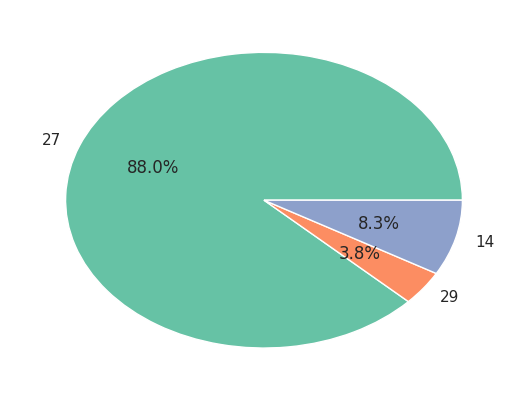

In [20]:
#predictmerge_tsv2.iloc[ft2.shape[1]+1:,:]
del merge_tsv2
#merged_tsv3.iloc[ft2.shape[1]+1:,:]=zscore(merged_tsv3.iloc[ft2.shape[1]+1:,:],axis=1)
predict_patient_classes=model1.predict(merged_tsv3.iloc[ft2.shape[1]+1:,:].values)
print(predict_patient_classes[:3])
del merged_tsv3
print(np.argmax(predict_patient_classes,axis=1))
pre_data=np.argmax(predict_patient_classes,axis=1).astype(np.int32)
del predict_patient_classes 
np.savetxt("TCGA-LIHC.htseq_fpkm.csv",pre_data,delimiter=',')
c = collections.Counter(pre_data)
print(c)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set2')

c_d=dict(c)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.pie(c_d.values(), labels=c_d.keys(), autopct="%1.1f%%")

plt.show()
##モデルの形と違っているのでおこられている
#おそらくmergeのあとで変化、、ft2ではあってる）
#mergeチェック、これもkillされているのでもういちっどモデルからやり直す

In [ ]:
del tsv

## 以下参考
* 平均化確認のためのヒストグラム
* メモリ確認

(array([4.0493e+04, 2.8520e+03, 3.6960e+03, 2.2470e+03, 1.3650e+03,
        8.7500e+02, 5.3800e+02, 6.4300e+02, 1.8500e+02, 6.0000e+00]),
 array([0.        , 0.89427693, 1.78855385, 2.68283078, 3.57710771,
        4.47138464, 5.36566156, 6.25993849, 7.15421542, 8.04849234,
        8.94276927]),
 <a list of 10 Patch objects>)

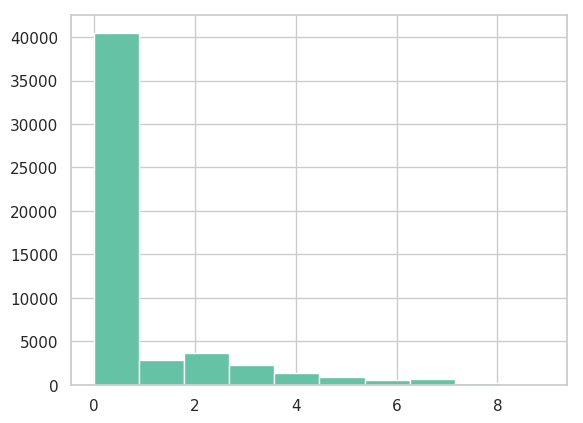

In [25]:
plt.hist(np.ravel(tsv.iloc[:100,1:].values))

(array([4.0771e+04, 3.2950e+03, 3.6180e+03, 2.4480e+03, 8.0000e+02,
        9.6600e+02, 5.7800e+02, 3.9400e+02, 2.8000e+01, 2.0000e+00]),
 array([  0.        ,  21.0990017 ,  42.19800341,  63.29700511,
         84.39600682, 105.49500852, 126.59401023, 147.69301193,
        168.79201364, 189.89101534, 210.99001705]),
 <a list of 10 Patch objects>)

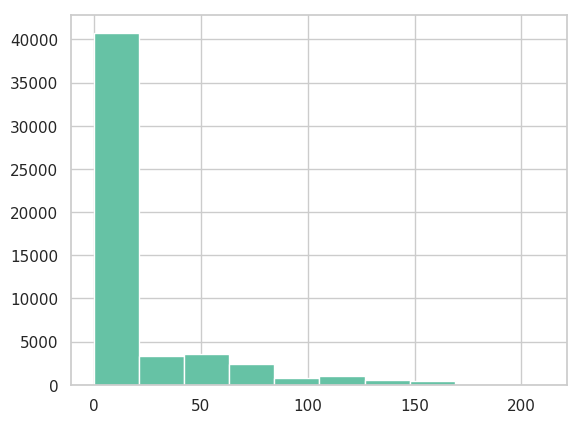

In [27]:
plt.hist(np.ravel(tsv.iloc[:100,1:].values))

(array([4.0289e+04, 2.8640e+03, 3.7270e+03, 2.3030e+03, 1.4610e+03,
        8.4800e+02, 5.6300e+02, 6.4400e+02, 1.9600e+02, 5.0000e+00]),
 array([-0.59264485,  0.04633357,  0.68531199,  1.32429041,  1.96326883,
         2.60224725,  3.24122567,  3.88020408,  4.5191825 ,  5.15816092,
         5.79713934]),
 <a list of 10 Patch objects>)

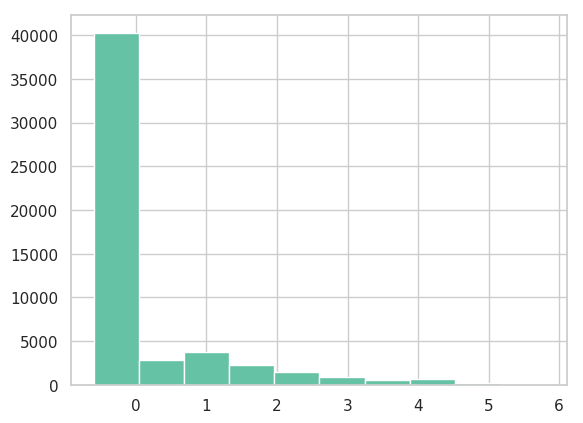

In [29]:
plt.hist(np.ravel(tsv.iloc[:100,1:].values))

In [50]:
%matplotlib inline

[[1.06298644e-03 6.99563709e-04 2.51353579e-03 5.34116197e-03
  7.41876778e-04 5.52369654e-03 1.80174503e-03 2.12992937e-03
  3.86823551e-04 4.14352107e-04 3.18985083e-04 7.39889947e-06
  3.27945244e-03 8.46030656e-04 2.56261718e-03 4.11812362e-04
  5.26319683e-01 1.24676879e-02 7.83873620e-05 2.33999155e-02
  1.41090611e-02 6.52686635e-04 6.46548644e-02 5.96397076e-05
  3.58245615e-03 3.85674136e-03 1.81621907e-03 3.14853281e-01
  3.34607001e-04 5.77279413e-03]
 [2.09483155e-03 1.09187001e-03 6.13716105e-03 1.44667272e-02
  3.04794312e-03 1.04569541e-02 9.09042137e-04 3.09462589e-03
  6.72392605e-04 1.00092764e-03 3.01670545e-04 1.04721685e-05
  4.29336587e-03 1.08413538e-03 1.20879803e-02 3.27765010e-04
  5.23399830e-01 6.65084040e-03 5.72786776e-05 1.26088774e-02
  2.45715696e-02 1.38140982e-03 6.92569762e-02 1.82093267e-04
  1.60870608e-02 4.54436615e-03 4.61866986e-03 2.62834102e-01
  4.04616585e-04 1.23244347e-02]
 [2.30872678e-03 1.03386992e-03 4.88461321e-03 1.93155892e-02
  7.

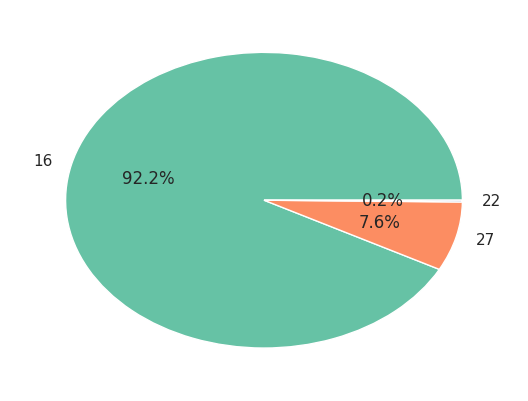

In [25]:
import sys
print("{}{:>25}{:>10}{}".format('|','valuable name','|','memory','|'))
print("-------")
for var in dir():
    if not var.startswith("_") and sys.getsizeof(eval(var))>10000:
        print("{}{:>25}{:>10}{}".format('|',var,'|',sys.getsizeof(eval(var)),'|'))

|            valuable name         |memory
-------
|                   X_test         |1313778064
|                      df4         |2805232
|                      ft2         |5262837465
|                merge_tsv         |5457850489
|                   pred_y         |350752
|                      tsv         |209513216
|                   y_test         |701392


In [26]:
del merge_tsv